Evaluate SVM model with k-fold cross validation.
Two types of parameter:
 - Parameters are found out by training the model using the training data. That were changed and found optimal values by running the model (from data). Ex: weights ($\theta$ or $w$).
 - Hyperparameter that we choose ourselves before training your model, outside of training process. We can choose the optimal values for this type of parameter but not from our model (no from data) by using another technique as Grid Search. Ex. kernel parameter in Kernel-SVM, k in K-mean, the depth of decision tree(no of trees, no of feature to be used), $\lambda$ in cost function, number of layers and learning  rate $\alpha$ in NNs.
 
Purpose of cross-validation:
    - https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79
    
Limitations of Cross Validation:
    - In an ideal world, the cross validation will yield meaningful and accurate results. However, the world is not perfect. You never know what kind of data the model might encounter in the future.
    - Usually, in predictive modelling, the structure you study evolves over a period. Hence, you can experience differences between the training and validation sets. Let us consider you have a model that predicts stock values.
    - Here is another example where the limitation of the cross validation process comes to the fore. You develop a model for predicting the individual’s risk of suffering from a particular ailment.






    

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


### Split data into the independent vs dependent variables

In [6]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

### Split data into train and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_X = StandardScaler()

In [11]:
X_train = sc_X.fit_transform(X_train)

In [12]:
X_test = sc_X.fit_transform(X_test)

### Fitting Kernel-SVM Model to the Tranining set

In [13]:
from sklearn.svm import SVC

In [14]:
classifier = SVC(kernel = 'rbf',random_state=0)

In [15]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)

### Making the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test,y_pred)

In [19]:
cm

array([[64,  4],
       [ 3, 29]])

### Applying k-Fold Cross Validation


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
#cv: number of folds we want to create

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Note: If we work on the large dataset, we need to set the <code>n_jobs</code> that is for running all the CPUs


In [23]:
accuracies.mean()

0.9005302187615868

In [24]:
accuracies.std()

0.06388957356626285

Standard deviation is 6% that means that when we evaluate our performance in most of the time, we get the accuracy between 90-6 and 90+6. This is low bias and low variance. 

### Visualising the  Training set results

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
X_set, y_set = X_train, y_train

In [27]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.5825424477554764, 3.3274575522443977)

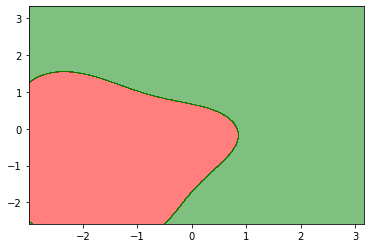

In [28]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

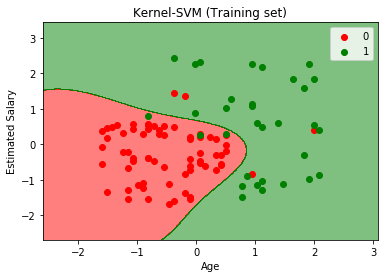

In [34]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                color = ListedColormap(('red','green'))(i),label =j  )
plt.title('Kernel-SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

In [30]:
from matplotlib.colors import ListedColormap

In [31]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.6884311278377804, 3.431568872162089)

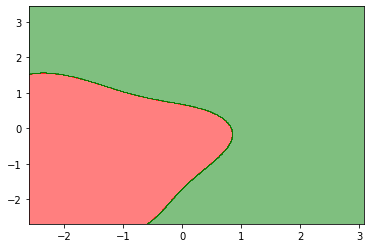

In [32]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

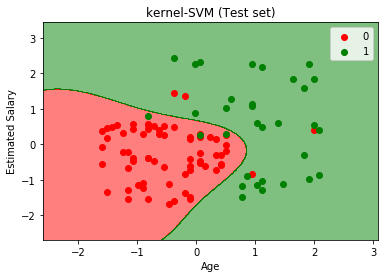

In [35]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                color = ListedColormap(('red','green'))(i),label =j  )
plt.title('kernel-SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()